# SMOTE Algorithm
- EDA 수행
- Ensemble 모델 지정(LightGBM, Before oversampling)
- SMOTE, BLSMOTE 방식을 이용한 Oversampling
- Oversampling된 모형을 다양한 모델에 적용(Logistic regression, Randomforest, Catboost)
- Ensemble의 ensemble 

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('./creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data = data.drop(['Time', 'Amount'], axis = 1)

#### Data - Credit Card Fraud Detection Data
1. 28개의 컬럼으로 구성
2. 타겟변수는 Class (0, 1 ; 이진분류)

In [5]:
# 컬럼 별로 결측치 여부 확인
data.isnull().any()  # 만약 존재한다면 0으로 대체 혹은, 해당 열을 제외하고 진행

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
Class    False
dtype: bool

In [6]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [7]:
# 종속 변수의 분포 확인
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

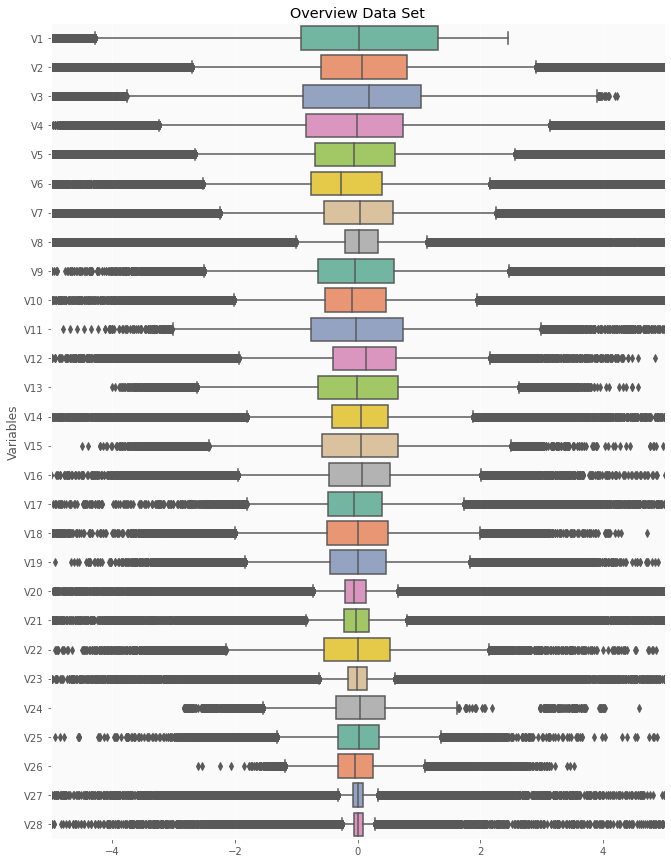

In [8]:
# EDA (탐색적 데이터 분석)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot') # Using ggplot2 style visuals 
f, ax = plt.subplots(figsize = (11, 15)) # 그래프 사이즈

ax.set_facecolor('#fafafa') # 그래프 색상값
ax.set(xlim = (-5, 5)) # X축 범위
plt.ylabel('Variables') # Y축 이름
plt.title("Overview Data Set") # 그래프 제목
ax = sns.boxplot(data = data.drop(columns = ['Class']), # V1 ~ V28 확인
                 orient = 'h', 
                 palette = 'Set2')

<Figure size 432x288 with 0 Axes>

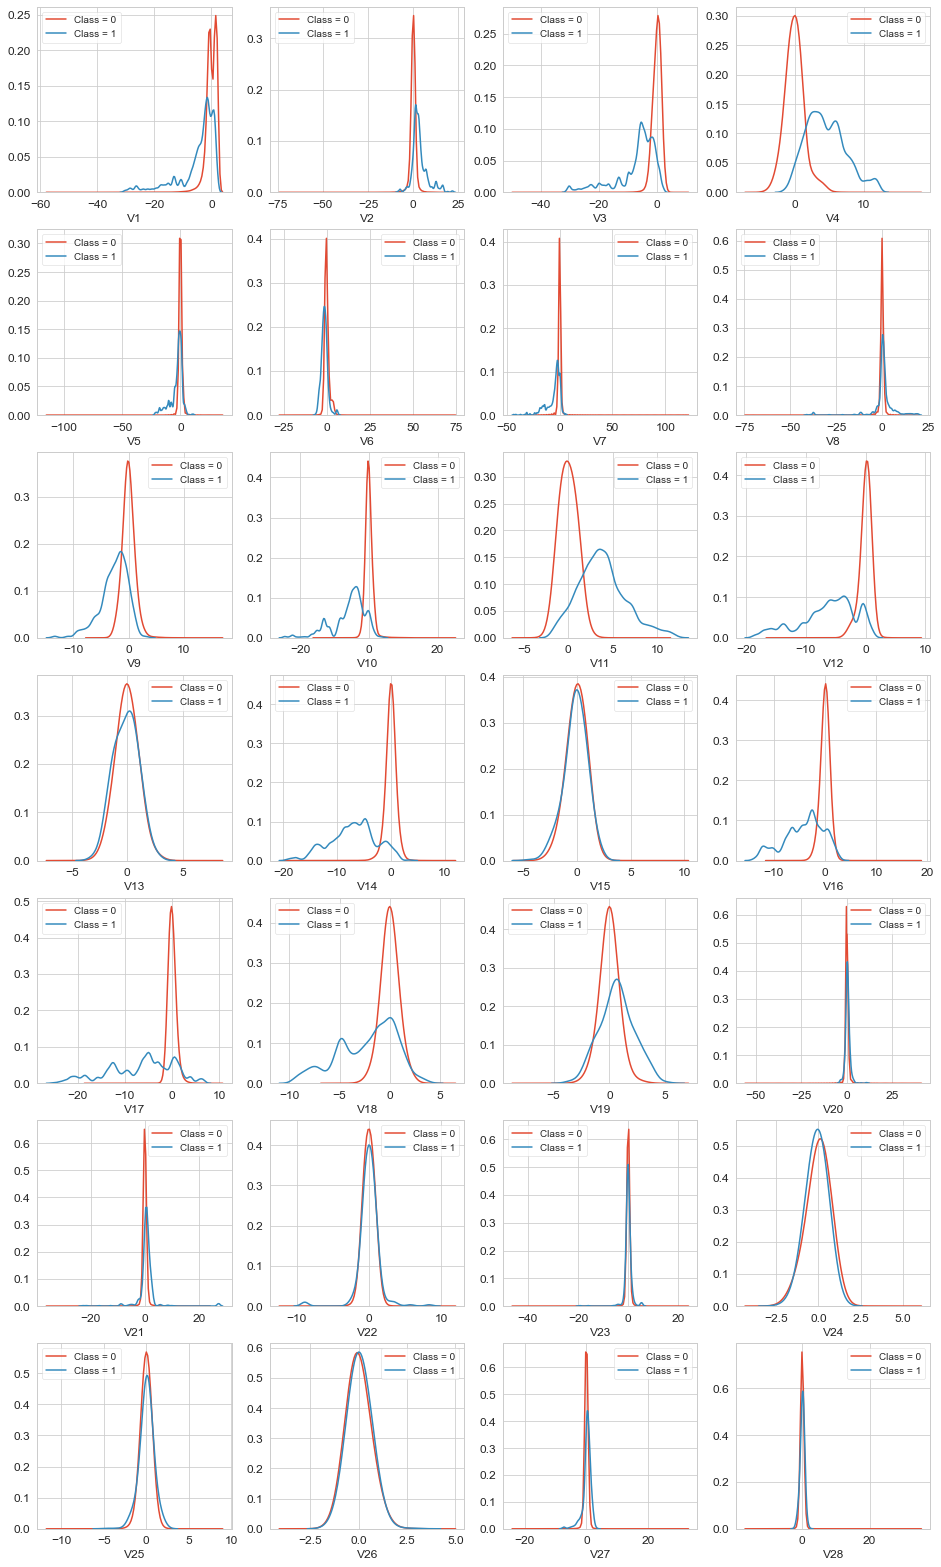

In [9]:
var = data.columns.values[:-1] # V1 ~ V28
i = 0
t0 = data.loc[data['Class'] == 0] # Class : 0 인 행만 추출
t1 = data.loc[data['Class'] == 1] # Class : 1 인 행만 추출

sns.set_style('whitegrid') # 그래프 스타일 지정
plt.figure()
fig, ax = plt.subplots(8, 4, figsize = (16, 28)) # 축 지정

for feature in var:
    i += 1
    plt.subplot(7, 4, i) # 28개의 그래프
    sns.kdeplot(t0[feature], bw = 0.5, label = "Class = 0")
    sns.kdeplot(t1[feature], bw = 0.5, label = "Class = 1")
    plt.xlabel(feature, fontsize = 12) # 라벨 속성값
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

#### 각 변수 별 그래프를 타겟변수에 대해서 그려보았을 떄 차이가 있는 변수들은 다음과 같이 정의할 수 있다.
- 1) 타겟 변수에 대해 분포 차이가 많이 나는 변수 : V4, V11
- 2) 타겟 변수에 대해 분포 차이가 비교적 많이 존재하는 변수 : V12, V14, V18
- 3) 타겟 변수에 대해 분포 차이가 비교적 적게 존재하는 변수 : V1, V2, V3, V10

In [10]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (284807, 28)
Shape of y: (284807, 1)


In [12]:
# 학습용, 검증용 데이터 셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 28)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 28)
Number transactions y_test dataset:  (56962, 1)


In [11]:
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))   # 정확도
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])      # 정밀도
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])         # 재현율
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)             # F1 score
    print("Model_Evaluation with Label:1")
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1-Score: ", F1_Score)

# RightGBM을 기본 모델로 지정

In [13]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, 
            'learning_rate': 0.01, 
            'objective': 'binary'} 
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain, num_boost_round=50) # 학습 진행

pred = np.repeat(0, len(y_test))
pred[lgb_model.predict(X_test) > 0.5] = 1  # threshold = 0.5를 기준으로 하여 클래스(0 or 1)를 결정
model_evaluation(y_test, pred) # 모델 분류 결과 평가

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.921875
Recall:  0.5841584158415841
F1-Score:  0.7151515151515151


In [14]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, 
            'learning_rate': 0.01,
            'objective': 'multiclass', 
            'num_class': len(set(pd.DataFrame(y_train))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain, num_boost_round=50) # 학습 진행
lgb_model_predict = np.argmax(lgb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model_predict) # 모델 분류 결과 평가

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.921875
Recall:  0.5841584158415841
F1-Score:  0.7151515151515151


# SMOTE을 이용해서 Oversampling 실시

In [15]:
# 기존의 X_train, y_train, X_test, y_test의 형태 확인
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 28)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 28)
Number transactions y_test dataset:  (56962, 1)


In [1]:
# !pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


In [17]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm = SMOTE(random_state = 42, sampling_strategy=0.3) # SMOTE 알고리즘, 비율 증가
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 68236
After OverSampling, counts of label '0': 227454


In [19]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, 
            'learning_rate': 0.01, 
            'objective': 'binary'} 
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain, num_boost_round=50) # 학습 진행

pred = np.repeat(0, len(y_test))
pred[lgb_model.predict(X_test) > 0.5] = 1  # threshold = 0.5를 기준으로 하여 클래스(0 or 1)를 결정
model_evaluation(y_test, pred) # 모델 분류 결과 평가

Model_Evaluation with Label:1
Accuracy:  0.9990695551420246
Precision:  0.6967213114754098
Recall:  0.8415841584158416
F1-Score:  0.7623318385650223


### F1-Score 값이 증가한 것을 확인할 수 있다.

# Minority data에 대해 비중을 높여, 1:1로 Oversampling을 실시하면?

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm2 = SMOTE(random_state = 42) # SMOTE 알고리즘, 비율 증가
X_train_res2, y_train_res2 = sm2.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res2==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res2==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 227454
After OverSampling, counts of label '0': 227454


In [23]:
lgb_dtrain2 = lgb.Dataset(data = pd.DataFrame(X_train_res2), label = pd.DataFrame(y_train_res2)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param2 = {'max_depth': 10, 
            'learning_rate': 0.01, 
            'objective': 'binary'} 
lgb_model2 = lgb.train(params = lgb_param2, train_set = lgb_dtrain2, num_boost_round=50) # 학습 진행

pred = np.repeat(0, len(y_test))
pred[lgb_model2.predict(X_test) > 0.5] = 1  # threshold = 0.5를 기준으로 하여 클래스(0 or 1)를 결정
model_evaluation(y_test, pred) # 모델 분류 결과 평가

Model_Evaluation with Label:1
Accuracy:  0.9835855482602437
Precision:  0.08794466403162056
Recall:  0.8811881188118812
F1-Score:  0.15992812219227312


### F1-Score 값이 감소했음을 알 수 있다 -> 성능 하락

# BLSMOTE을 이용한 Oversampling 실시

In [24]:
# BLSM (Borderline SMOTE)
from imblearn.over_sampling import BorderlineSMOTE

sm3 = BorderlineSMOTE(random_state = 42, sampling_strategy = 0.3) # BLSM 알고리즘 적용
X_train_res3, y_train_res3 = sm3.fit_sample(X_train, y_train.ravel()) # Over Sampling 적용

In [26]:
lgb_dtrain3 = lgb.Dataset(data = pd.DataFrame(X_train_res3), label = pd.DataFrame(y_train_res3)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, 
            'learning_rate': 0.01, 
            'objective': 'binary'} 
lgb_model3 = lgb.train(params = lgb_param, train_set = lgb_dtrain3, num_boost_round=50) # 학습 진행

pred = np.repeat(0, len(y_test))
pred[lgb_model3.predict(X_test) > 0.5] = 1  # threshold = 0.5를 기준으로 하여 클래스(0 or 1)를 결정
model_evaluation(y_test, pred) # 모델 분류 결과 평가

Model_Evaluation with Label:1
Accuracy:  0.9984199992977775
Precision:  0.5369127516778524
Recall:  0.7920792079207921
F1-Score:  0.64


### 이 데이터의 경우, 기존 SMOTE 방식이 BLSMOTE 방식에 비해 더 좋은 성능을 보여줌

# 다양한 모델에 적용
- 선형회귀(로지스틱), Random Forest, CatBoost

In [27]:
# BLSM을 이용해서 Oversampling 한 학습 데이터 셋 : X_train_res2, y_train_res2
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 1e+10) 
# sklearn 의 Logistic Regression은 기본적으로 Ridge 정규화가 포함되어 있기 때문에, 
# 정규화 텀을 억제하는 C를 크게 적용한다 (C:Inverse of regularization strength)
lr_model.fit(X_train_res, y_train_res) # 로지스틱 회귀 모형 학습
lr_predict = lr_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
model_evaluation(y_test, lr_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [28]:
np.sum(lr_predict==1)

511

In [30]:
# 라쏘 로지스틱 회귀모형 학습
lasso_model = LogisticRegression(penalty = 'l1', solver='saga') # Penalty = l1 Regularizer, C = 1.0 (Default))
lasso_model.fit(X_train_res, y_train_res) # 라쏘 로지스틱 회귀 모형 학습
lasso_predict = lasso_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
model_evaluation(y_test, lasso_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [31]:
np.sum(lasso_predict==1)

511

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                             max_depth = 10, # 트리 최대 깊이 10
                                             random_state = 42) # 시드값 고정
rf_model = random_forest_model.fit(X_train_res, y_train_res) # 학습 진행
rf_predict = rf_model.predict(X_test) # 평가 데이터 예측
model_evaluation(y_test, rf_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.7288135593220338
Recall:  0.8514851485148515
F1-Score:  0.7853881278538813


In [34]:
# Catboost
import catboost as cb
cb_dtrain = cb.Pool(data = X_train_res, label = y_train_res) # 학습 데이터를 Catboost 모델에 맞게 변환
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'MultiClass'} # 손실 함수, 목적 함수
cb_model = cb.train(pool = cb_dtrain, params = cb_param, num_boost_round=50) # 학습 진행
cb_model_predict = np.argmax(cb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1
model_evaluation(y_test, cb_model_predict) # 모델 분류 평가 결과

0:	learn: 0.9694748	total: 460ms	remaining: 22.5s
1:	learn: 0.9711218	total: 1.04s	remaining: 24.9s
2:	learn: 0.9712368	total: 1.62s	remaining: 25.4s
3:	learn: 0.9719267	total: 2.27s	remaining: 26.1s
4:	learn: 0.9719740	total: 2.74s	remaining: 24.6s
5:	learn: 0.9719301	total: 3.19s	remaining: 23.4s
6:	learn: 0.9717610	total: 3.68s	remaining: 22.6s
7:	learn: 0.9721025	total: 4.14s	remaining: 21.8s
8:	learn: 0.9721296	total: 4.63s	remaining: 21.1s
9:	learn: 0.9720552	total: 5.1s	remaining: 20.4s
10:	learn: 0.9722818	total: 5.58s	remaining: 19.8s
11:	learn: 0.9722243	total: 6.08s	remaining: 19.3s
12:	learn: 0.9720484	total: 6.55s	remaining: 18.6s
13:	learn: 0.9721634	total: 7.02s	remaining: 18.1s
14:	learn: 0.9722175	total: 7.5s	remaining: 17.5s
15:	learn: 0.9721161	total: 7.98s	remaining: 17s
16:	learn: 0.9720992	total: 8.47s	remaining: 16.4s
17:	learn: 0.9722243	total: 8.92s	remaining: 15.9s
18:	learn: 0.9721905	total: 9.41s	remaining: 15.4s
19:	learn: 0.9721803	total: 9.89s	remaining: 

# Ensemble의 ensemble
- 성능이 가장 좋은 Random Forest 모델을 바탕으로 진행

In [35]:
import random
bagging_predict_result = [] # 빈 리스트 생성
number_of_bagging = 5 # Bagging 횟수
for _ in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_res.shape[0]) # 
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                                 max_depth = 10, # 트리 최대 깊이 10
                                                 random_state = 42) # 시드값 고정
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict(X_test) # 평가 데이터 예측
    bagging_predict_result.append(rf_predict2) # 예측 결과를 bagging_predict_result에 저장
    print(_+1, "Model Evaluation Result:", "\n") # 전체적인 성능 평가
    model_evaluation(y_test, rf_predict2) # 모델 분류 평가 결과

D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


1 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992275552122467
Precision:  0.7522123893805309
Recall:  0.8415841584158416
F1-Score:  0.794392523364486


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


2 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9991573329588147
Precision:  0.7264957264957265
Recall:  0.8415841584158416
F1-Score:  0.7798165137614679


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


3 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


4 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


5 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599


# Bagging을 바탕으로 예측한 결과값에 대해 다수결로 예측

In [36]:
bagging_predict = [] # 빈 리스트 생성
for lst2_index in range(X_test.shape[0]): # 테스트 데이터 개수만큼 반복
    temp_predict = [] # 반복문 내 임시 빈 리스트 생성
    for lst_index in range(len(bagging_predict_result)): # Bagging 결과 리스트 개수 만큼 반복
        temp_predict.append(bagging_predict_result[lst_index][lst2_index]) # 각 Bagging 결과 예측한 값 중 같은 인덱스를 리스트에 저장
    if np.mean(temp_predict) >= 0.5: # 0, 1 이진분류이므로, 예측값의 평균이 0.5보다 크면 1, 아니면 0으로 예측 다수결)
        bagging_predict.append(1)
    elif np.mean(temp_predict) < 0.5: # 예측값의 평균이 0.5보다 낮으면 0으로 결과 저장
        bagging_predict.append(0)
model_evaluation(y_test, bagging_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9992275552122467
Precision:  0.7478260869565218
Recall:  0.8514851485148515
F1-Score:  0.7962962962962963


In [37]:
rf_model2.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 조금 더 효율적인 방식으로 Ensemble의 ensemble을 수행하는 방법
- 클래스가 아닌 확률을 이용해보자

In [38]:
import random
bagging_predict_result = 0 # 각 데이터에 대해, bagging 방식을 통해 minority class로 판별할 확률 값을 나타내는 리스트
number_of_bagging = 5 # Bagging 횟수
for i in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_res.shape[0]) 
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                                 max_depth = 10, # 트리 최대 깊이 10
                                                 random_state = 42) # 시드값 고정
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict_proba(X_test)[: , 1]  # minority class의 확률 값을 추출(0번째 열은 majority prob value)
    bagging_predict_result += rf_predict2 # 예측 결과를 bagging_predict_result에 합산
    print(i)

D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


1


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


2


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


3


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


4


- threshold의 변화에 따른 성능 측정

In [39]:
def cut_off(y,threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

In [40]:
threshold = np.arange(0,1,0.1)

In [41]:
for i in threshold :
    pred_y = cut_off(bagging_predict_result / number_of_bagging ,i)
    print('***** Model evaluation in threshold {} *****'.format(i))
    model_evaluation(y_test, pred_y)

***** Model evaluation in threshold 0.0 *****
Model_Evaluation with Label:1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764
***** Model evaluation in threshold 0.1 *****
Model_Evaluation with Label:1
Accuracy:  0.9683473192654752
Precision:  0.05021141649048626
Recall:  0.9405940594059405
F1-Score:  0.09533366783743101
***** Model evaluation in threshold 0.2 *****
Model_Evaluation with Label:1
Accuracy:  0.9938028861346161
Precision:  0.20833333333333334
Recall:  0.8910891089108911
F1-Score:  0.33771106941838647
***** Model evaluation in threshold 0.30000000000000004 *****
Model_Evaluation with Label:1
Accuracy:  0.998121554720691
Precision:  0.48333333333333334
Recall:  0.8613861386138614
F1-Score:  0.6192170818505338
***** Model evaluation in threshold 0.4 *****
Model_Evaluation with Label:1
Accuracy:  0.9988939995084443
Precision:  0.6397058823529411
Recall:  0.8613861386138614
F1-Score:  0.7341772151898734
***** Model ev

# 개선!!
- 오분류 데이터에 대해 가중치를 부여하여, ensemble의 ensemble + bagging 실시

In [43]:
import random
bagging_predict_result = 0 # 각 데이터에 대해, bagging 방식을 통해 minority class로 판별할 확률 값을 나타내는 리스트
number_of_bagging = 5 # Bagging 횟수
for i in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    # 초기에는 각각의 데이터가 추출될 확률이 동일함
    if i ==0 : 
        p_list= np.repeat(1/X_train_res.shape[0],X_train_res.shape[0])
    # 두 번째 라운드부터, 오분류 된 데이터에 대하여, (복원)추출될 확률을 2배로 증가시켜줌
    else :
        p_list = np.repeat(1 / X_train_res.shape[0],X_train_res.shape[0])
        p_list[rf_model2.predict(X_train_res) != y_train_res] = p_list[rf_model2.predict(X_train_res) != y_train_res] * 2
        p_list = p_list / sum(p_list)
    random_data_index = np.random.choice(data_index, X_train_res.shape[0],p = p_list)
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42) 
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict_proba(X_test)[: , 1]
    bagging_predict_result=bagging_predict_result+(rf_predict2) # 예측 결과를 bagging_predict_result에 저장
    print(i)

D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4


- threshold의 변화에 따른 성능 측정

In [44]:
def cut_off(y,threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

In [45]:
threshold = np.arange(0,1,0.1)

In [46]:
for i in threshold :
    pred_y = cut_off(bagging_predict_result / number_of_bagging ,i)
    print('***** Model evaluation in threshold {} *****'.format(i))
    model_evaluation(y_test, pred_y)

***** Model evaluation in threshold 0.0 *****
Model_Evaluation with Label:1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764
***** Model evaluation in threshold 0.1 *****
Model_Evaluation with Label:1
Accuracy:  0.9508444225975211
Precision:  0.033206502940159116
Recall:  0.9504950495049505
F1-Score:  0.06417112299465241
***** Model evaluation in threshold 0.2 *****
Model_Evaluation with Label:1
Accuracy:  0.9885537726905657
Precision:  0.12311901504787962
Recall:  0.8910891089108911
F1-Score:  0.21634615384615383
***** Model evaluation in threshold 0.30000000000000004 *****
Model_Evaluation with Label:1
Accuracy:  0.9969979986657772
Precision:  0.35655737704918034
Recall:  0.8613861386138614
F1-Score:  0.5043478260869566
***** Model evaluation in threshold 0.4 *****
Model_Evaluation with Label:1
Accuracy:  0.9987711105649381
Precision:  0.6083916083916084
Recall:  0.8613861386138614
F1-Score:  0.7131147540983607
***** Model 

### Threshold = 0.8일 때, F1-Score 값이 0.854에서 0.863으로 증가한 것을 확인할 수 있음